# Downloading Station Data

In [1]:
import matplotlib.pyplot as plt

#Librairies for working with multi-dimensional arrays
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr #Opening netcdf files as datasets and dataArrays
import pandas as pd

In [2]:
from shapely.geometry import mapping
import geopandas as gpd 

Coordinates for Lamma station

lat= 64.12745, lon= 29.50261

In [82]:
# ACCESS-CM2

hist_pr_acc = xr.open_dataset(r"D:\GCM\ACCESS_CM2\CMIP6 data\pr_ACCESS-CM2_historical.nc")
hist_pr_acc= hist_pr_acc.sel(time=slice('1981-01-01','2010-12-31'))


#Model CMCC-ESM2
hist_pr_cmcc = xr.open_dataset(r"D:\GCM\CMCC-ESM2\CMIP6 data\pr_CMCC-ESM2_historical.nc")
hist_pr_cmcc= hist_pr_cmcc.sel(time=slice('1981-01-01','2010-12-31'))
hist_pr_cmcc

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 12, lon: 15)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2010-12-31T12:00:00
  * lat      (lat) float64 59.55 60.55 61.55 62.55 ... 67.55 68.55 69.55 70.55
  * lon      (lon) int32 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
Data variables:
    pr       (time, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/9c81777c-32b6-4da9-bb1d-5f82f76f0354
    regrid_method:          bilinear

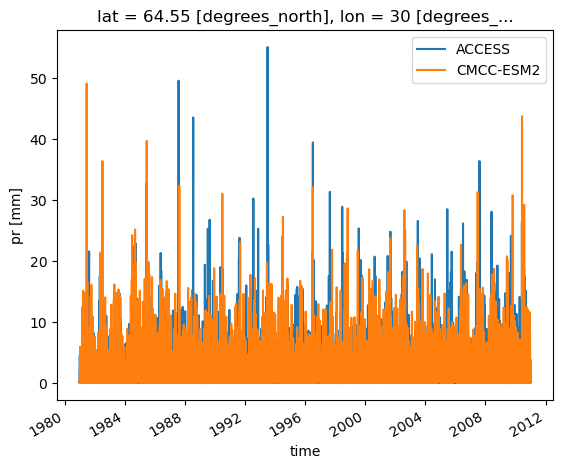

In [83]:
hist_pr_acc.pr.sel(lat=64.12745, lon= 29.50261, method='nearest').plot(label= 'ACCESS')
hist_pr_cmcc.pr.sel(lat=64.12745, lon= 29.50261, method='nearest').plot(label= 'CMCC-ESM2')
plt.legend()

In [4]:
obs_pr= xr.open_dataset(r"C:\Christine\Hydrology\Downscale\Oulujoki\PTET0_1981_2022.nc")
obs_pr = obs_pr.sel(time=slice('1981-01-01','2010-12-31'))

In [5]:
obs_pr


<xarray.Dataset>
Dimensions:      (lon: 25, lat: 21, time: 10957)
Coordinates:
  * lon          (lon) float32 4.287e+05 4.387e+05 ... 6.587e+05 6.687e+05
  * lat          (lat) float32 7.292e+06 7.282e+06 ... 7.102e+06 7.092e+06
  * time         (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2010-12-31
Data variables:
    spatial_ref  int32 ...
    tas          (time, lat, lon) float32 ...
    pr           (time, lat, lon) float32 ...
    ET0          (time, lat, lon) float32 ...
Attributes:
    units:      degC
    long_name:  Daily mean temperature at 2m
    min:        [-22.8 -25.4 -32.  -36.1 -24.1 -12.  -17.5 -22.3 -25.9 -26.8 ...
    max:        [  1.   -0.7  -1.4  -1.8  -0.6  -0.5   0.   -0.4  -1.    0.4 ...

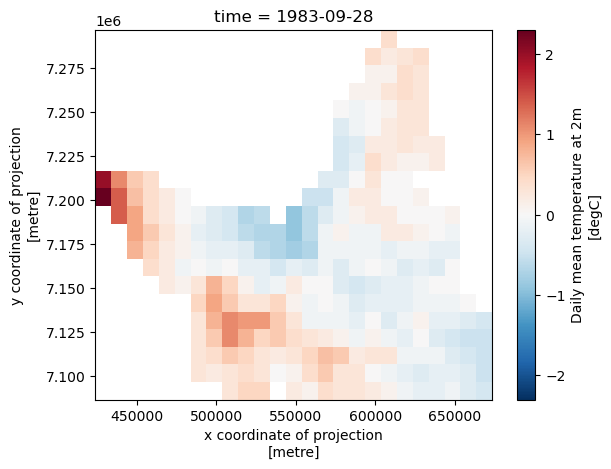

In [6]:
obs_pr.tas[1000].plot()

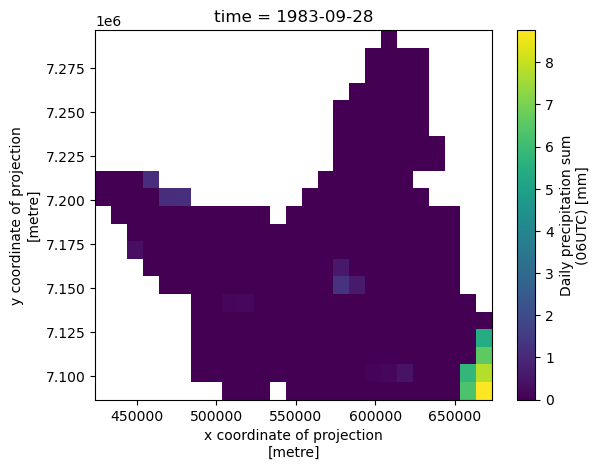

In [7]:
obs_pr.pr[1000].plot()

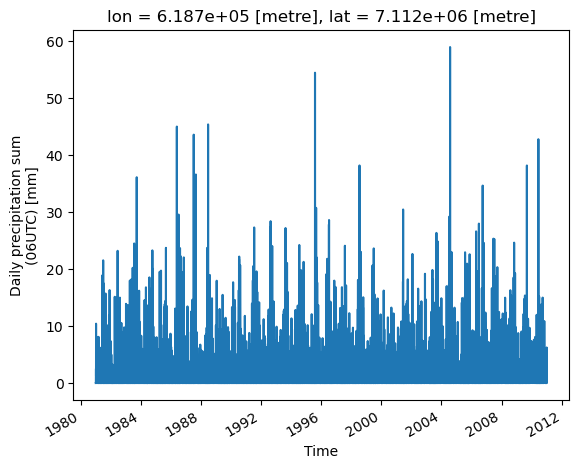

In [8]:
obs_pr.pr.sel(lat=7112636.445, lon=620296.2702, method='nearest').plot()

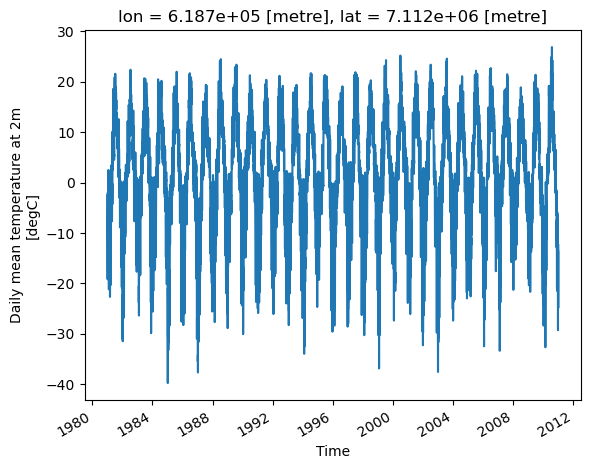

In [9]:
obs_pr.tas.sel(lat=7112636.445, lon=620296.2702, method='nearest').plot()

In [86]:
df_obs= obs_pr.pr.sel(lat=7112636.445, lon=620296.2702, method='nearest').to_dataframe()
df_access= hist_pr_acc.pr.sel(lat=64.12745, lon= 29.50261, method='nearest').to_dataframe()
df_cmcc=hist_pr_cmcc.pr.sel(lat=64.12745, lon= 29.50261, method='nearest').to_dataframe()


In [87]:
#Dropping extra columns
df_obs= df_obs.drop(['lon','lat'], axis=1)
df_access= df_access.drop(['lon','lat'], axis = 1)
df_cmcc= df_cmcc.drop(['lon', 'lat'], axis= 1)

#renaming the columns
df_obs = df_obs.rename(columns={'pr':'Obs_pr'})
df_access = df_access.rename(columns={'pr':'Access_pr'})
df_cmcc= df_cmcc.rename(columns={'pr':'CMCC_pr'})

In [88]:
df_cmcc= df_cmcc.resample('D').mean()
df_cmcc

,CMCC_pr
time,
1981-01-01,0.052342
1981-01-02,0.046857
1981-01-03,0.094025
1981-01-04,0.027509
1981-01-05,0.238443
...,...
2010-12-27,3.873192
2010-12-28,1.148800
2010-12-29,0.276223


In [89]:
pr_hist= pd.concat([df_obs, df_access, df_cmcc], axis=1, join='inner')
pr_hist.head()

,Obs_pr,Access_pr,CMCC_pr
time,,,
1981-01-01,0.0000,4.360413,0.052342
1981-01-02,0.0000,0.727147,0.046857
1981-01-03,0.0000,0.100229,0.094025
1981-01-04,1.3008,0.196714,0.027509
1981-01-05,0.0000,0.118282,0.238443


In [80]:
DATADIR= r"C:\Users\cnakigud23\OneDrive - Oulun yliopisto\PHD Oulu\Courses\Cold climate Hydrology\Climate Systems and Climate\Exercise/"

In [81]:
pr_hist.to_excel(f'{DATADIR}pr_hist.xlsx')

## Temperature

In [59]:
# ACCESS-CM2

hist_tas_acc = xr.open_dataset(r"D:\GCM\ACCESS_CM2\CMIP6 data\tas_ACCESS-CM2_historical.nc")
hist_tas_acc= hist_tas_acc.sel(time=slice('1981-01-01','2010-12-31'))


#Model CMCC-ESM2
hist_tas_cmcc = xr.open_dataset(r"D:\GCM\CMCC-ESM2\CMIP6 data\tas_CMCC-ESM2_historical.nc")
hist_tas_cmcc= hist_tas_cmcc.sel(time=slice('1981-01-01','2010-12-31'))
hist_tas_cmcc

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 12, lon: 12)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2010-12-31T12:00:00
    height   float64 ...
  * lat      (lat) float64 59.0 60.0 61.0 62.0 63.0 ... 66.0 67.0 68.0 69.0 70.0
  * lon      (lon) float64 20.0 21.0 22.0 23.0 24.0 ... 27.0 28.0 29.0 30.0 31.0
Data variables:
    tas      (time, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/e4f99501-92dd-466f-b193-2ad6b6a1a1ca
    regrid_method:          bilinear

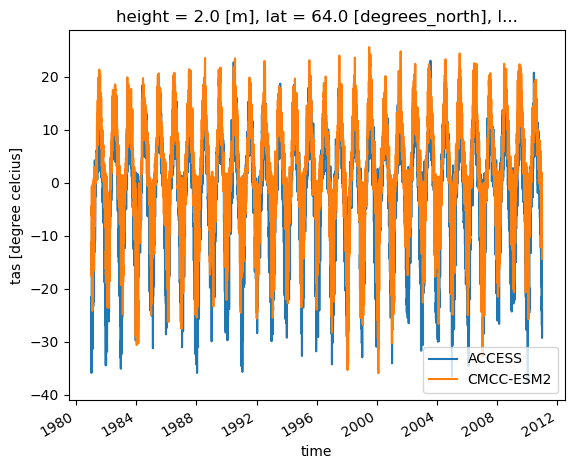

In [55]:
hist_tas_acc.tas.sel(lat=64.12745, lon= 29.50261, method='nearest').plot(label= 'ACCESS')
hist_tas_cmcc.tas.sel(lat=64.12745, lon= 29.50261, method='nearest').plot(label= 'CMCC-ESM2')
plt.legend()

In [60]:
df_obs_tas= obs_pr.tas.sel(lat=7112636.445, lon=620296.2702, method='nearest').to_dataframe()
df_access_tas= hist_tas_acc.tas.sel(lat=64.12745, lon= 29.50261, method='nearest').to_dataframe()
df_cmcc_tas=hist_tas_cmcc.tas.sel(lat=64.12745, lon= 29.50261, method='nearest').to_dataframe()


In [63]:
#Dropping extra columns
df_obs_tas= df_obs_tas.drop(['lon','lat'], axis=1)
df_access_tas= df_access_tas.drop(['lon','lat','height'], axis = 1)
df_cmcc_tas= df_cmcc_tas.drop(['lon', 'lat', 'height'], axis= 1)

#renaming the columns
df_obs_tas = df_obs_tas.rename(columns={'tas':'Obs_tas'})
df_access_tas = df_access_tas.rename(columns={'tas':'Access_tas'})
df_cmcc_tas= df_cmcc_tas.rename(columns={'tas':'CMCC_tas'})

In [64]:
df_cmcc_tas= df_cmcc_tas.resample('D').mean()
df_cmcc_tas.head()

,CMCC_tas
time,
1981-01-01,-11.216117
1981-01-02,-14.223463
1981-01-03,-15.058107
1981-01-04,-17.644665
1981-01-05,-14.937850


In [65]:
tas_hist= pd.concat([df_obs_tas, df_access_tas, df_cmcc_tas], axis=1, join='inner')
tas_hist.head()

,Obs_tas,Access_tas,CMCC_tas
time,,,
1981-01-01,-7.300000,-21.760588,-11.216117
1981-01-02,-8.900000,-21.537729,-14.223463
1981-01-03,-14.000000,-30.609522,-15.058107
1981-01-04,-16.200001,-28.427212,-17.644665
1981-01-05,-17.600000,-28.811224,-14.937850


In [66]:
tas_hist.to_excel(f'{DATADIR}tas_hist.xlsx')

## SSP scenarios

In [98]:
ssp_acc= xr.open_dataset(r"D:\GCM\ACCESS_CM2\CMIP6 data\pr_ACCESS-CM2_ssp585.nc")
ssp_acc = ssp_acc.sel(time=slice('2070-01-01','2099-12-31'))

ssp_cmcc=  xr.open_dataset(r"D:\GCM\CMCC-ESM2\CMIP6 data\pr_CMCC-ESM2_ssp585.nc")
ssp_cmcc= ssp_cmcc.sel(time=slice('2070-01-01','2099-12-31'))
ssp_cmcc

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 12, lon: 15)
Coordinates:
  * time     (time) datetime64[ns] 2070-01-01T12:00:00 ... 2099-12-31T12:00:00
  * lat      (lat) float64 59.55 60.55 61.55 62.55 ... 67.55 68.55 69.55 70.55
  * lon      (lon) int32 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
Data variables:
    pr       (time, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    comment:                none
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/0c6732f7-2cdd-4296-99a0-7952b7ca911e
    regrid_method:          bilinear

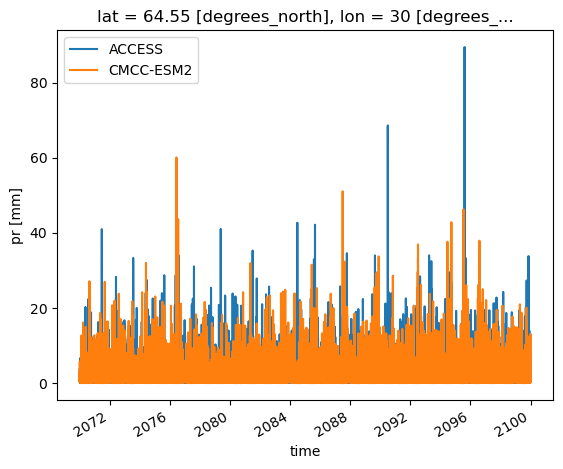

In [99]:
ssp_acc.pr.sel(lat=64.12745, lon= 29.50261, method='nearest').plot(label= 'ACCESS')
ssp_cmcc.pr.sel(lat=64.12745, lon= 29.50261, method='nearest').plot(label= 'CMCC-ESM2')
plt.legend()

In [102]:
df_ssp_access= ssp_acc.pr.sel(lat=64.12745, lon= 29.50261, method='nearest').to_dataframe()
df_ssp_cmcc = ssp_cmcc.pr.sel(lat=64.12745, lon= 29.50261, method='nearest').to_dataframe()

In [103]:
df_ssp_cmcc

,lat,lon,pr
time,,,
2070-01-01 12:00:00,64.55,30,3.044779
2070-01-02 12:00:00,64.55,30,2.484539
2070-01-03 12:00:00,64.55,30,2.147639
2070-01-04 12:00:00,64.55,30,0.268828
2070-01-05 12:00:00,64.55,30,0.315939
...,...,...,...
2099-12-27 12:00:00,64.55,30,0.168872
2099-12-28 12:00:00,64.55,30,0.526191
2099-12-29 12:00:00,64.55,30,1.573346


In [104]:
df_ssp_access= df_ssp_access.drop(['lon','lat'], axis = 1)
df_ssp_cmcc= df_ssp_cmcc.drop(['lon', 'lat'], axis= 1)

#renaming the columns

df_ssp_access = df_ssp_access.rename(columns={'pr':'Access_pr'})
df_ssp_cmcc= df_ssp_cmcc.rename(columns={'pr':'CMCC_pr'})

df_ssp_cmcc= df_ssp_cmcc.resample('D').mean()
df_ssp_cmcc

,CMCC_pr
time,
2070-01-01,3.044779
2070-01-02,2.484539
2070-01-03,2.147639
2070-01-04,0.268828
2070-01-05,0.315939
...,...
2099-12-27,0.168872
2099-12-28,0.526191
2099-12-29,1.573346


In [105]:
pr_ssp245= pd.concat([ df_ssp_access, df_ssp_cmcc], axis=1, join='inner')
pr_ssp245.head()

,Access_pr,CMCC_pr
time,,
2070-01-01,0.677707,3.044779
2070-01-02,0.500792,2.484539
2070-01-03,0.475723,2.147639
2070-01-04,0.393727,0.268828
2070-01-05,0.215770,0.315939


In [106]:
pr_ssp245.to_excel(f'{DATADIR}pr_ssp585.xlsx')

## SSP Temperature

In [113]:
ssp_acc= xr.open_dataset(r"D:\GCM\ACCESS_CM2\CMIP6 data\tas_ACCESS-CM2_ssp585.nc")
ssp_acc = ssp_acc.sel(time=slice('2070-01-01','2099-12-31'))

ssp_cmcc=  xr.open_dataset(r"D:\GCM\CMCC-ESM2\CMIP6 data\tas_CMCC-ESM2_ssp585.nc")
ssp_cmcc= ssp_cmcc.sel(time=slice('2070-01-01','2099-12-31'))
ssp_cmcc

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 12, lon: 12)
Coordinates:
  * time     (time) datetime64[ns] 2070-01-01T12:00:00 ... 2099-12-31T12:00:00
    height   float64 ...
  * lat      (lat) float64 59.0 60.0 61.0 62.0 63.0 ... 66.0 67.0 68.0 69.0 70.0
  * lon      (lon) float64 20.0 21.0 22.0 23.0 24.0 ... 27.0 28.0 29.0 30.0 31.0
Data variables:
    tas      (time, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    comment:                none
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/3fdd9c9b-967d-49e7-90d6-6735d713ca66
    regrid_method:          bilinear

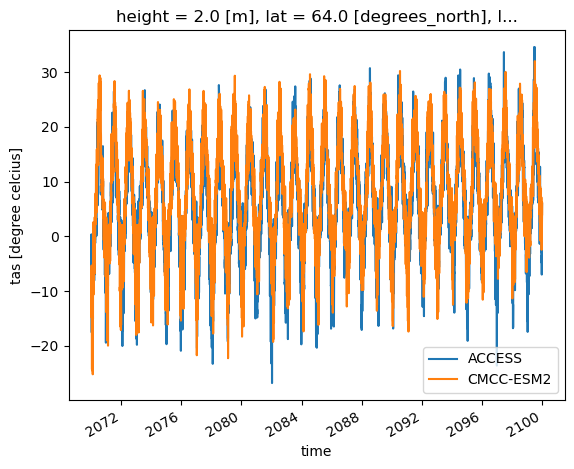

In [114]:
ssp_acc.tas.sel(lat=64.12745, lon= 29.50261, method='nearest').plot(label= 'ACCESS')
ssp_cmcc.tas.sel(lat=64.12745, lon= 29.50261, method='nearest').plot(label= 'CMCC-ESM2')
plt.legend()

In [115]:
df_ssp_access= ssp_acc.tas.sel(lat=64.12745, lon= 29.50261, method='nearest').to_dataframe()
df_ssp_cmcc = ssp_cmcc.tas.sel(lat=64.12745, lon= 29.50261, method='nearest').to_dataframe()
df_ssp_cmcc

,height,lat,lon,tas
time,,,,
2070-01-01 12:00:00,2.0,64.0,30.0,-6.443851
2070-01-02 12:00:00,2.0,64.0,30.0,-7.626224
2070-01-03 12:00:00,2.0,64.0,30.0,-12.691957
2070-01-04 12:00:00,2.0,64.0,30.0,-12.316762
2070-01-05 12:00:00,2.0,64.0,30.0,-8.420443
...,...,...,...,...
2099-12-27 12:00:00,2.0,64.0,30.0,2.556427
2099-12-28 12:00:00,2.0,64.0,30.0,1.073179
2099-12-29 12:00:00,2.0,64.0,30.0,2.245573


In [116]:
df_ssp_access= df_ssp_access.drop(['lon','lat','height'], axis = 1)
df_ssp_cmcc= df_ssp_cmcc.drop(['lon', 'lat', 'height'], axis= 1)

#renaming the columns

df_ssp_access = df_ssp_access.rename(columns={'tas':'Access_tas'})
df_ssp_cmcc= df_ssp_cmcc.rename(columns={'tas':'CMCC_tas'})

df_ssp_cmcc= df_ssp_cmcc.resample('D').mean()
df_ssp_cmcc

,CMCC_tas
time,
2070-01-01,-6.443851
2070-01-02,-7.626224
2070-01-03,-12.691957
2070-01-04,-12.316762
2070-01-05,-8.420443
...,...
2099-12-27,2.556427
2099-12-28,1.073179
2099-12-29,2.245573


In [118]:
tas_ssp245= pd.concat([ df_ssp_access, df_ssp_cmcc], axis=1, join='inner')
tas_ssp245.head()

,Access_tas,CMCC_tas
time,,
2070-01-01,-7.132427,-6.443851
2070-01-02,-11.173551,-7.626224
2070-01-03,-9.637594,-12.691957
2070-01-04,-8.879797,-12.316762
2070-01-05,-13.683709,-8.420443


In [119]:
tas_ssp245.to_excel(f'{DATADIR}tas_ssp585.xlsx')